In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv("IQ_level.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   108 non-null    int64  
 1   country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   education_expenditure  103 non-null    float64
 4   avg_income             106 non-null    float64
 5   avg_temp               108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


In [7]:
data.head()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1


In [8]:
data = data.dropna(subset=['rank', 'IQ', 'education_expenditure', 'avg_income', 'avg_temp'])

In [9]:
data.hist


<bound method hist_frame of      rank       country   IQ  education_expenditure  avg_income  avg_temp
0       1    Hong Kong   106                 1283.0     35304.0      26.2
1       2         Japan  106                 1340.0     40964.0      19.2
2       3     Singapore  106                 1428.0     41100.0      31.5
4       5         China  104                  183.0      4654.0      19.1
5       6   South Korea  103                 1024.0     22805.0      18.2
..    ...           ...  ...                    ...         ...       ...
102   103   Ivory Coast   61                   69.0      1289.0      32.2
104   105        Gambia   55                   14.0       648.0      32.9
105   106     Guatemala   55                   92.0      2830.0      32.1
106   107  Sierra Leone   52                   16.0       412.0      30.4
107   108         Nepal   51                   22.0       595.0      24.6

[103 rows x 6 columns]>

array([[<Axes: title={'center': 'rank'}>, <Axes: title={'center': 'IQ'}>],
       [<Axes: title={'center': 'education_expenditure'}>,
        <Axes: title={'center': 'avg_income'}>],
       [<Axes: title={'center': 'avg_temp'}>, <Axes: >]], dtype=object)

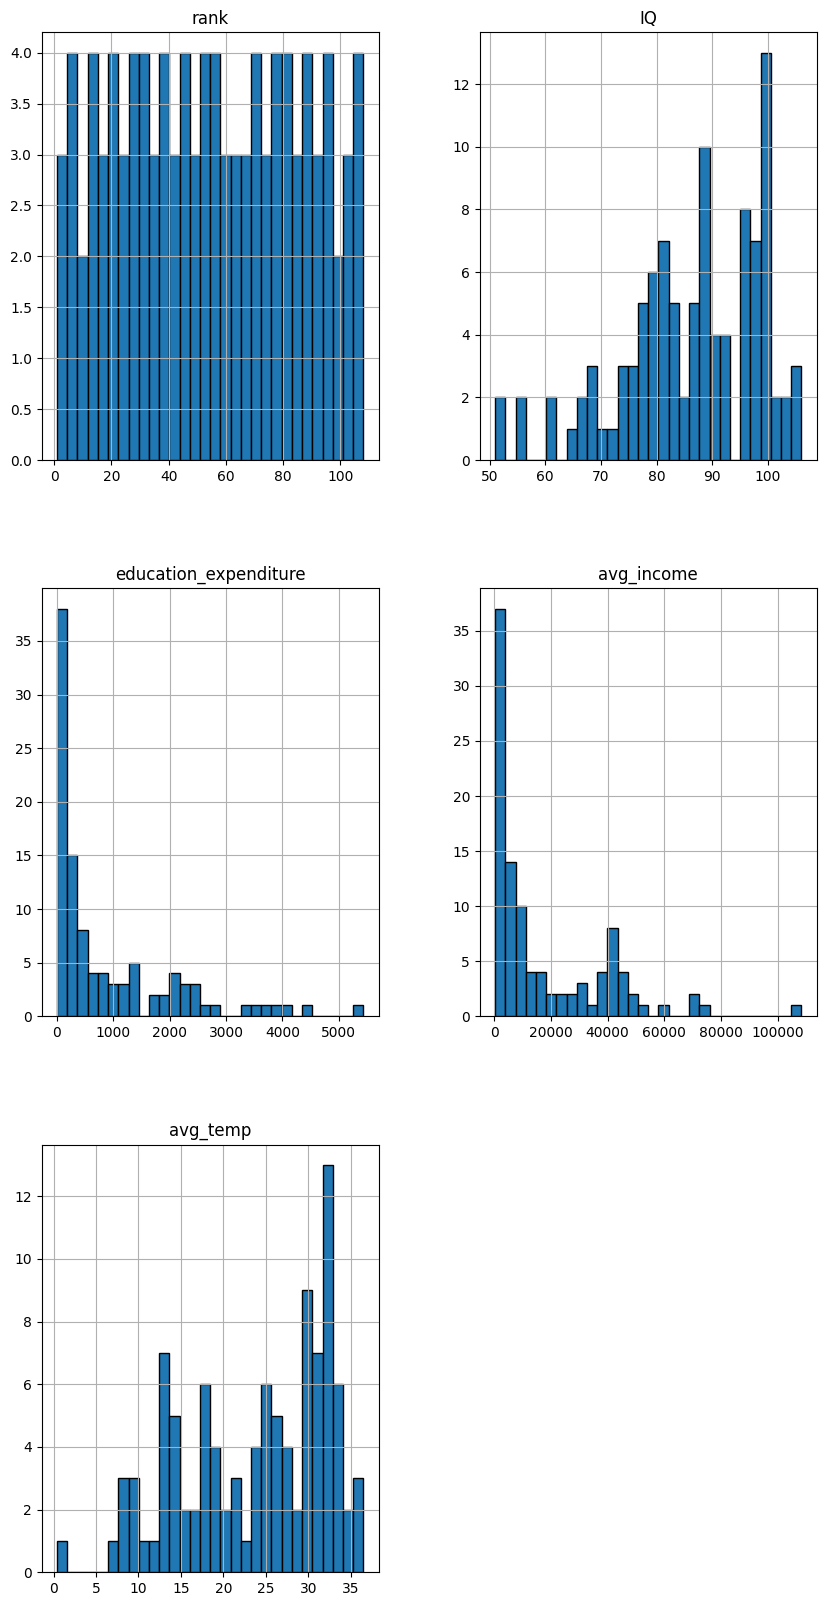

In [10]:
data.hist(figsize=(10,20), bins=30, edgecolor="black")

In [11]:
X = data[['education_expenditure', 'avg_income', 'avg_temp']]
y = data[['rank', 'IQ']]

In [12]:
print(X)

     education_expenditure  avg_income  avg_temp
0                   1283.0     35304.0      26.2
1                   1340.0     40964.0      19.2
2                   1428.0     41100.0      31.5
4                    183.0      4654.0      19.1
5                   1024.0     22805.0      18.2
..                     ...         ...       ...
102                   69.0      1289.0      32.2
104                   14.0       648.0      32.9
105                   92.0      2830.0      32.1
106                   16.0       412.0      30.4
107                   22.0       595.0      24.6

[103 rows x 3 columns]


In [13]:
data.head(107)

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
4,5,China,104,183.0,4654.0,19.1
5,6,South Korea,103,1024.0,22805.0,18.2
...,...,...,...,...,...,...
102,103,Ivory Coast,61,69.0,1289.0,32.2
104,105,Gambia,55,14.0,648.0,32.9
105,106,Guatemala,55,92.0,2830.0,32.1
106,107,Sierra Leone,52,16.0,412.0,30.4


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model_rank = LinearRegression()
model_rank.fit(X_train, y_train['rank'])

LinearRegression()

In [16]:
model_iq = LinearRegression()
model_iq.fit(X_train, y_train['IQ'])

LinearRegression()

In [17]:
y_pred_rank = model_rank.predict(X_test)

In [18]:
y_pred_iq = model_iq.predict(X_test)

In [19]:
data_manuelles = np.array([[2725.0,	42706.0,	8.2]])

prediction_IQ = model_iq.predict(data_manuelles)
prediction_rank = model_rank.predict(data_manuelles)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
print("La prédiction d'IQ est de : ", prediction_IQ)
print("La prédiction de rang est de : ", prediction_rank)

La prédiction d'IQ est de :  [101.37279591]
La prédiction de rang est de :  [13.76474529]


In [21]:
data.head(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
4,5,China,104,183.0,4654.0,19.1
5,6,South Korea,103,1024.0,22805.0,18.2
6,7,Netherlands,101,2386.0,45337.0,14.4
7,8,Finland,101,2725.0,42706.0,8.2
8,9,Canada,100,2052.0,40207.0,7.4
10,11,Luxembourg,100,3665.0,71296.0,14.7
11,12,Macao,100,1448.0,44072.0,26.1


In [22]:
# On peut constater que la prédiction fonctionne bien sur
# la donnée "IQ" mais l'algorithme a du mal avec le rang
#car c'est une petite valeur précise.
# Les valeurs entrées dans "data_manuelles" correspondent aux
# valeurs de "Findland"

In [23]:
model_rank.score(X_train, y_train['rank'])

0.6119399692524601

In [24]:
model_iq.score(X_train,y_train['IQ'])

0.516796150531923